Explication de la solution:

Cette solution est une implémentation d'un Algorithme Génétique (AG) avec élitisme pour le problème de bin packing, où des objets doivent être répartis dans des bacs de manière à minimiser le nombre total de bacs utilisés. Il commence par générer une population initiale de solutions aléatoires. Ensuite, il itère sur un certain nombre d'itérations, sélectionnant des parents par tournoi, puis produisant des enfants par croisement et mutation. La sélection élitiste garantit que les meilleurs individus de la population actuelle sont préservés. Les paramètres tels que la taille de la population, le nombre maximal d'itérations et la probabilité de sélection influent sur la performance de l'algorithme. Finalement, les résultats sont affichés sous forme de tableau et de graphique 3D pour analyser la relation entre ces paramètres et le nombre de bacs utilisés.

Population Size | Max Iterations | Selection Probability | Nombre de Bacs  | Temps écoulé
-----------------------------------------------------------------------
10              | 30             | 0.3                    | 310             | 0.0635
10              | 30             | 0.8                    | 325             | 0.0455
10              | 30             | 0.99                   | 318             | 0.1283
10              | 50             | 0.3                    | 309             | 0.0581
10              | 50             | 0.8                    | 316             | 0.0378
10              | 50             | 0.99                   | 314             | 0.0368
10              | 500            | 0.3                    | 319             | 0.4093
10              | 500            | 0.8                    | 319             | 0.3450
10              | 500            | 0.99                   | 315             | 0.3413
20              | 30             | 0.3                    | 323          

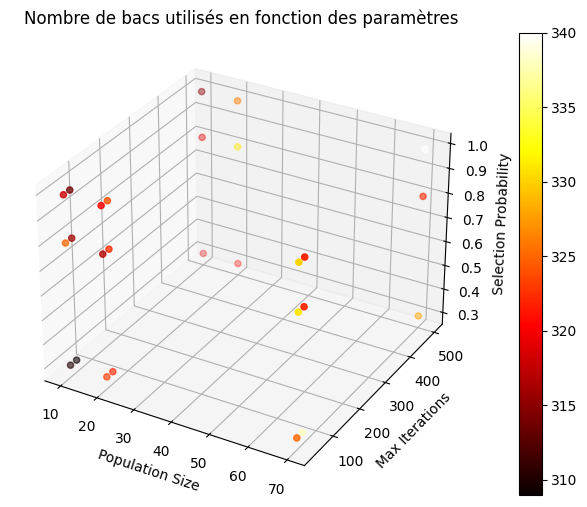

In [6]:
from re import S
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

class Individual:
    def __init__(self, solution, fitness):
        self.solution = solution  # La solution représente l'agencement des objets dans les bacs
        self.fitness = fitness    # La fitness représente la qualité de la solution, basée sur la somme des objets dans les bacs

# Générer une solution aléatoire
def generate_random_solution(items, num_bins, bin_capacity):
    solution = [[] for _ in range(num_bins)]  # Initialiser une liste de bacs vides
    for item in items:
        bin_idx = random.randint(0, num_bins - 1)  # Choisir un bac aléatoire
        solution[bin_idx].append(item)             # Ajouter l'objet au bac choisi
    return solution

# Fonction de fitness
def fitness_function(bin_contents, bin_capacity):
    return sum(sum(item) for item in bin_contents)  # Somme des objets dans tous les bacs

# Sélection par tournoi
def tournament_selection(population, tournament_size, selection_probability):
    selected = []
    while len(selected) < tournament_size:
        contestants = random.sample(population, tournament_size)  # Sélectionner des individus aléatoires
        winner = max(contestants, key=lambda x: x.fitness)        # Sélectionner le meilleur individu
        if random.random() < selection_probability:
            selected.append(winner)                               # Ajouter le gagnant à la liste des sélectionnés
    return selected

# Sélection élitiste
def elitist_selection(parents, children, population_size):
    combined_population = parents + children                     # Combinaison des parents et des enfants
    combined_population.sort(key=lambda x: x.fitness)            # Trier la population combinée par fitness croissante
    return combined_population[:population_size]                 # Retourner les 'population_size' meilleurs individus

# Croisement
def crossover(parent1, parent2):
    point1 = random.randint(1, len(parent1) - 1)                 # Point de croisement 1
    point2 = random.randint(point1, len(parent1) - 1)             # Point de croisement 2
    child = parent1[:point1] + parent2[point1:point2] + parent1[point2:]  # Croisement des parents
    return child

# Mutation
def mutation(child, bin_capacity):
    index = random.randint(0, len(child) - 1)                    # Choix aléatoire d'un bac
    child[index] = [random.randint(1, bin_capacity)]             # Mutation : remplacer les objets dans le bac choisi
    return child

# Algorithme génétique avec élitisme
def genetic_algorithm_with_elitism(items, num_bins, bin_capacity, population_size, max_iterations):
    population = [Individual(generate_random_solution(items, num_bins, bin_capacity), float('inf')) for _ in range(population_size)]  # Générer une population initiale aléatoire
    for _ in range(max_iterations):
        parents = tournament_selection(population, tournament_size, selection_probability)  # Sélection des parents par tournoi
        children = []
        for _ in range(population_size - 2):
            child = crossover(parents[0].solution, parents[1].solution)      # Croisement des parents
            if random.random() < 0.1:
                child = mutation(child, bin_capacity)                        # Mutation avec une faible probabilité
            children.append(Individual(child, fitness_function(child, bin_capacity)))  # Ajouter l'enfant à la liste des enfants
        population = elitist_selection(parents, children, population_size)      # Sélection élitiste des meilleurs individus
    best_solution = min(population, key=lambda x: x.fitness).solution          # Sélection de la meilleure solution
    return best_solution

# Lire les données à partir d'un fichier
def read_data_from_file(filename):
    with open(filename, 'r') as file:
        num_bins = int(file.readline().strip())                    # Nombre de bacs
        bin_capacity = int(file.readline().strip())                # Capacité des bacs
        items = []
        for line in file:
            items.extend(map(int, line.strip().split()))          # Ajouter les objets à la liste
        return num_bins, bin_capacity, items

if __name__ == "__main__":
    filename = "benchmark500.txt"  # Nom du fichier d'entrée
    num_bins, bin_capacity, items = read_data_from_file(filename)  # Lire les données à partir du fichier

    tournament_size = 9                                            # Taille du tournoi pour la sélection

    population_sizes = [10, 20, 70]           # Tailles de la population
    max_iteration_values = [30, 50, 500]        # Valeurs maximales d'itérations
    selection_probabilities = [0.3, 0.8, 0.99] # Probabilités de sélection

    results = []  # Liste pour stocker les résultats

    for population_size in population_sizes:
        for max_iterations in max_iteration_values:
            for selection_probability in selection_probabilities:
                start_time = time.time()
                best_solution = genetic_algorithm_with_elitism(items, num_bins, bin_capacity, population_size, max_iterations)
                end_time = time.time()
                elapsed_time=end_time-start_time
                num_bins_best_solution = len([bin_contents for bin_contents in best_solution if bin_contents])
                results.append((population_size, max_iterations, selection_probability, num_bins_best_solution,elapsed_time))


    print("Population Size | Max Iterations | Selection Probability | Nombre de Bacs  | Temps écoulé")
    print("-----------------------------------------------------------------------")
    for result in results:
        print("{:<15} | {:<14} | {:<22} | {:<15} | {:.4f}".format(*result))

    # Dessin du tableau 3D
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = [params[0] for params in results]
    y = [params[1] for params in results]
    z = [params[2] for params in results]
    c = [params[3] for params in results]

    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    fig.colorbar(img)
    ax.set_xlabel('Population Size')
    ax.set_ylabel('Max Iterations')
    ax.set_zlabel('Selection Probability')
    plt.title('Nombre de bacs utilisés en fonction des paramètres')
    plt.show()
